<a href="https://colab.research.google.com/github/eaglehkim/python/blob/main/prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rg = Ridge(alpha=0.12) # alpha가 커질수록 규제값이 작아진다
rg.fit(X_train, y_train)

Ridge(alpha=0.12)

In [ ]:
rg.score(X_test, y_test) # 회귀는 score를 쓰면 안된다

0.4109537743522047

In [ ]:
# 회귀 -> score을 쓰면 안된다 그렇다면? - 1. 상관계수
#                                         2. mean_squared_error

# 상관계수로 비교
# 실제 결과와 예측 결과를 비교
np.corrcoef(y_test, rg.predict(X_test))

array([[1.        , 0.64287567],
       [0.64287567, 1.        ]])

In [ ]:
# 왜 상관계수는 주식/돈 등 스케일이 큰 값에 쓰면 안될까?
# - 상관계수는 크기가 상관없기 때문
# ex) x 1  2  3 
#     y 10 20 30     -> 상관계수가 1
# ex) x 1    2    3
#     y 1000 2000 3000 -> 상관계수가 1
# 쓰는 사람이 있긴하지만 한계가 분명하다
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, rg.predict(X_test))
mse

3831.9160388584683

In [ ]:
# 뭘 쓰든 정답은 없다.
mse/np.max(y_test) # 스케일링 - max normalization mse
mse/np.mean(y_test)
mse/(np.max(y_test)-np.min(y_test))

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dnn = Sequential()
dnn.add(Dense(200, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(1))
dnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam') # 회귀때는 mse만 쓴다

In [ ]:
dnn.fit(X_train, y_train, epochs=20, batch_size=20)

Epoch 1/20
17/17 [==============================] - 0s 5ms/step - loss: 2999.7747 - mean_absolute_error: 44.6765
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 2951.3904 - mean_absolute_error: 44.4067
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 2927.9548 - mean_absolute_error: 44.0185
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 2911.7678 - mean_absolute_error: 43.9842
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 2932.6943 - mean_absolute_error: 43.9500
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 2955.0137 - mean_absolute_error: 44.3340
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 2922.9932 - mean_absolute_error: 43.8530
Epoch 8/20
17/17 [==============================] - 0s 5ms/step - loss: 2920.1995 - mean_absolute_error: 43.4413
Epoch 9/20
17/17 [==============================] - 0s 6ms/step - loss: 2887.2961 - mean_absolut

In [ ]:
dnn.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2946.0042 - mean_absolute_error: 43.0385


[2946.004150390625, 43.0384635925293]

In [ ]:
# 상관계수, mse
np.corrcoef(np.array(y_test), dnn.predict(X_test).T) # 각 데이터 셋을 직접 펼쳐보고 어레이를 맞춰줘야 한다

array([[1.        , 0.70298525],
       [0.70298525, 1.        ]])

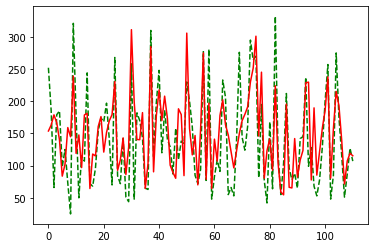

In [ ]:
plt.plot(range(len(X_test)), y_test, 'g--')
plt.plot(range(len(X_test)), dnn.predict(X_test), 'r')

In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
data = pdr.get_data_yahoo("FB", start='2021-02-01', end='2022-02-01')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,259.519989,264.170013,254.910004,262.010010,262.010010,22914300
2021-02-02,264.000000,268.850006,263.269989,267.079987,267.079987,17320800
2021-02-03,265.619995,269.200012,263.839996,266.649994,266.649994,14223400
2021-02-04,267.010010,268.160004,264.000000,266.489990,266.489990,16060000
2021-02-05,266.799988,269.170013,265.670013,268.100006,268.100006,12454400


In [ ]:
op = np.array(data['Open'])
hi = np.array(data['High'])
low = np.array(data['Low'])
cl = np.array(data['Close'])
adj = np.array(data['Adj Close'])
V = np.array(data['Volume'])

In [ ]:
X = np.column_stack((op, hi, low, cl, V))
y = adj

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y)

In [ ]:
dnn = Sequential()
dnn.add(Dense(200, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(100, activation='relu'))
dnn.add(Dense(1))
dnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam')

In [ ]:
dnn.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
2/2 [==============================] - 0s 11ms/step - loss: 65.7527 - mean_absolute_error: 6.0148
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 64.2965 - mean_absolute_error: 5.9532
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 62.9304 - mean_absolute_error: 5.8710
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 61.5958 - mean_absolute_error: 5.7811
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 60.0690 - mean_absolute_error: 5.7032
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 58.7902 - mean_absolute_error: 5.6403
Epoch 7/50
2/2 [==============================] - 0s 32ms/step - loss: 57.4439 - mean_absolute_error: 5.5757
Epoch 8/50
2/2 [==============================] - 0s 21ms/step - loss: 56.2997 - mean_absolute_error: 5.5212
Epoch 9/50
2/2 [==============================] - 0s 9ms/step - loss: 55.2075 - mean_absolute_error: 5.4775
Epoch 10/50
2/2 [====

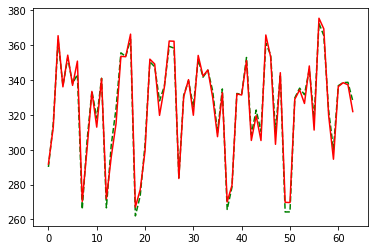

In [ ]:
plt.plot(y_test, 'g--')
plt.plot(dnn.predict(X_test), 'r')

**2022 - 3 - 17**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
np.unique(df['target'])

array([0, 1, 2])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
iris_s = ss.fit_transform(iris.data)
iris_s

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
input=iris_s
output=df['target']

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input,output)

In [ ]:
from sklearn import svm
svc=svm.SVC(kernel="linear", C=1) #poly, rbf

In [ ]:
svc.fit(train_input,train_output)

SVC(C=1, kernel='linear')

In [ ]:
svc.score(test_input,test_output)

0.9736842105263158

In [ ]:
svc.predict(test_input)

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0])

In [ ]:
test_output

114    2
15     0
41     0
120    2
133    2
57     1
144    2
75     1
107    2
31     0
137    2
25     0
138    2
111    2
106    2
117    2
90     1
73     1
102    2
141    2
92     1
62     1
4      0
123    2
16     0
129    2
108    2
143    2
78     1
35     0
28     0
48     0
149    2
43     0
76     1
136    2
68     1
10     0
Name: target, dtype: int64

In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
data = pdr.get_data_yahoo('FB', start="2021-03-03", end="2022-03-03")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-03,260.290009,260.989990,255.100006,255.410004,255.410004,15513500
2021-03-04,256.470001,266.489990,253.500000,257.640015,257.640015,31626500
2021-03-05,260.670013,265.450012,255.610001,264.279999,264.279999,26820100
2021-03-08,265.549988,265.579987,255.050003,255.309998,255.309998,18391800
2021-03-09,261.179993,268.529999,259.809998,265.739990,265.739990,22039700


In [ ]:
open = np.array(data['Open'])
high = np.array(data['High'])
low = np.array(data['Low'])
close = np.array(data['Close'])
adj = np.array(data['Adj Close'])

In [ ]:
X = np.column_stack((open, high, low, close))
y = adj

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
dnn = Sequential()
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(200, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(1))
dnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam')

In [ ]:
# RNN 돌릴때는 np.stack할 때 순서가 중요, 왜냐면 서로서로 영향을 주기때문에
rnn = Sequential()
rnn.add(SimpleRNN(200 ,input_shape=(4, 1))) # open, high, low, close, volume, 
rnn.add(Dense(150, activation='relu'))
rnn.add(Dense(200, activation='relu'))
rnn.add(Dense(150, activation='relu'))
rnn.add(Dense(1))
rnn.compile(loss='mean_squared_error',metrics='mean_absolute_error', optimizer='adam')

In [ ]:
rnn.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
4/4 [==============================] - 2s 11ms/step - loss: 104339.4062 - mean_absolute_error: 320.4994
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 103274.2734 - mean_absolute_error: 318.8174
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 99756.4375 - mean_absolute_error: 313.1530
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 90670.6953 - mean_absolute_error: 297.9237
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 72075.2734 - mean_absolute_error: 264.1007
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 43584.8828 - mean_absolute_error: 201.0619
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 13519.3701 - mean_absolute_error: 104.0164
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 6016.9194 - mean_absolute_error: 62.5255
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 9787.2598 

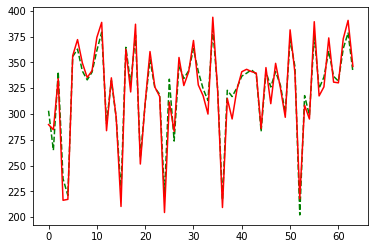

In [ ]:
plt.plot(y_test, 'g--')
plt.plot(dnn.predict(X_test), 'r');

In [ ]:
rnn.predict(X_test).T

array([[343.12888, 339.63925, 284.59882, 344.38342, 345.10132, 282.563  ,
        345.486  , 341.81702, 342.28644, 340.829  , 345.12775, 344.88885,
        341.31818, 342.921  , 345.55118, 283.20978, 272.0703 , 276.24384,
        342.13306, 282.7804 , 282.9325 , 340.56155, 344.85156, 344.60413,
        273.99588, 343.6326 , 343.00113, 284.9748 , 342.87918, 271.96988,
        343.69504, 344.03156, 340.839  , 340.80502, 339.5602 , 345.61594,
        344.0868 , 275.3802 , 284.21613, 285.7395 , 344.6107 , 343.4306 ,
        342.94476, 339.99374, 274.14264, 340.50638, 284.86963, 340.8203 ,
        342.8125 , 345.44806, 345.13596, 339.8364 , 345.319  , 277.76804,
        279.30597, 285.4099 , 341.2491 , 343.17398, 340.92834, 342.383  ,
        342.53455, 333.35327, 272.16623, 342.55798]], dtype=float32)

In [ ]:
np.corrcoef(rnn.predict(X_test).T, np.array(y_test))

array([[1.        , 0.81694149],
       [0.81694149, 1.        ]])

**2022 - 3 - 22**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
np.unique(df['flower'])

array([0, 1, 2])

In [ ]:
input = iris.data
output = df['flower']

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=5) # hypterparamter - 층 수(부모 층을 제외한 층)
dt.fit(train_input, train_output)

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.score(test_input, test_output)

0.8947368421052632

[Text(0.375, 0.9, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [36, 37, 39]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.7\ngini = 0.5\nsamples = 76\nvalue = [0, 37, 39]'),
 Text(0.25, 0.5, 'petal length (cm) <= 5.0\ngini = 0.1\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'petal length (cm) <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.625, 0.3, 'sepal length (cm) <= 5.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

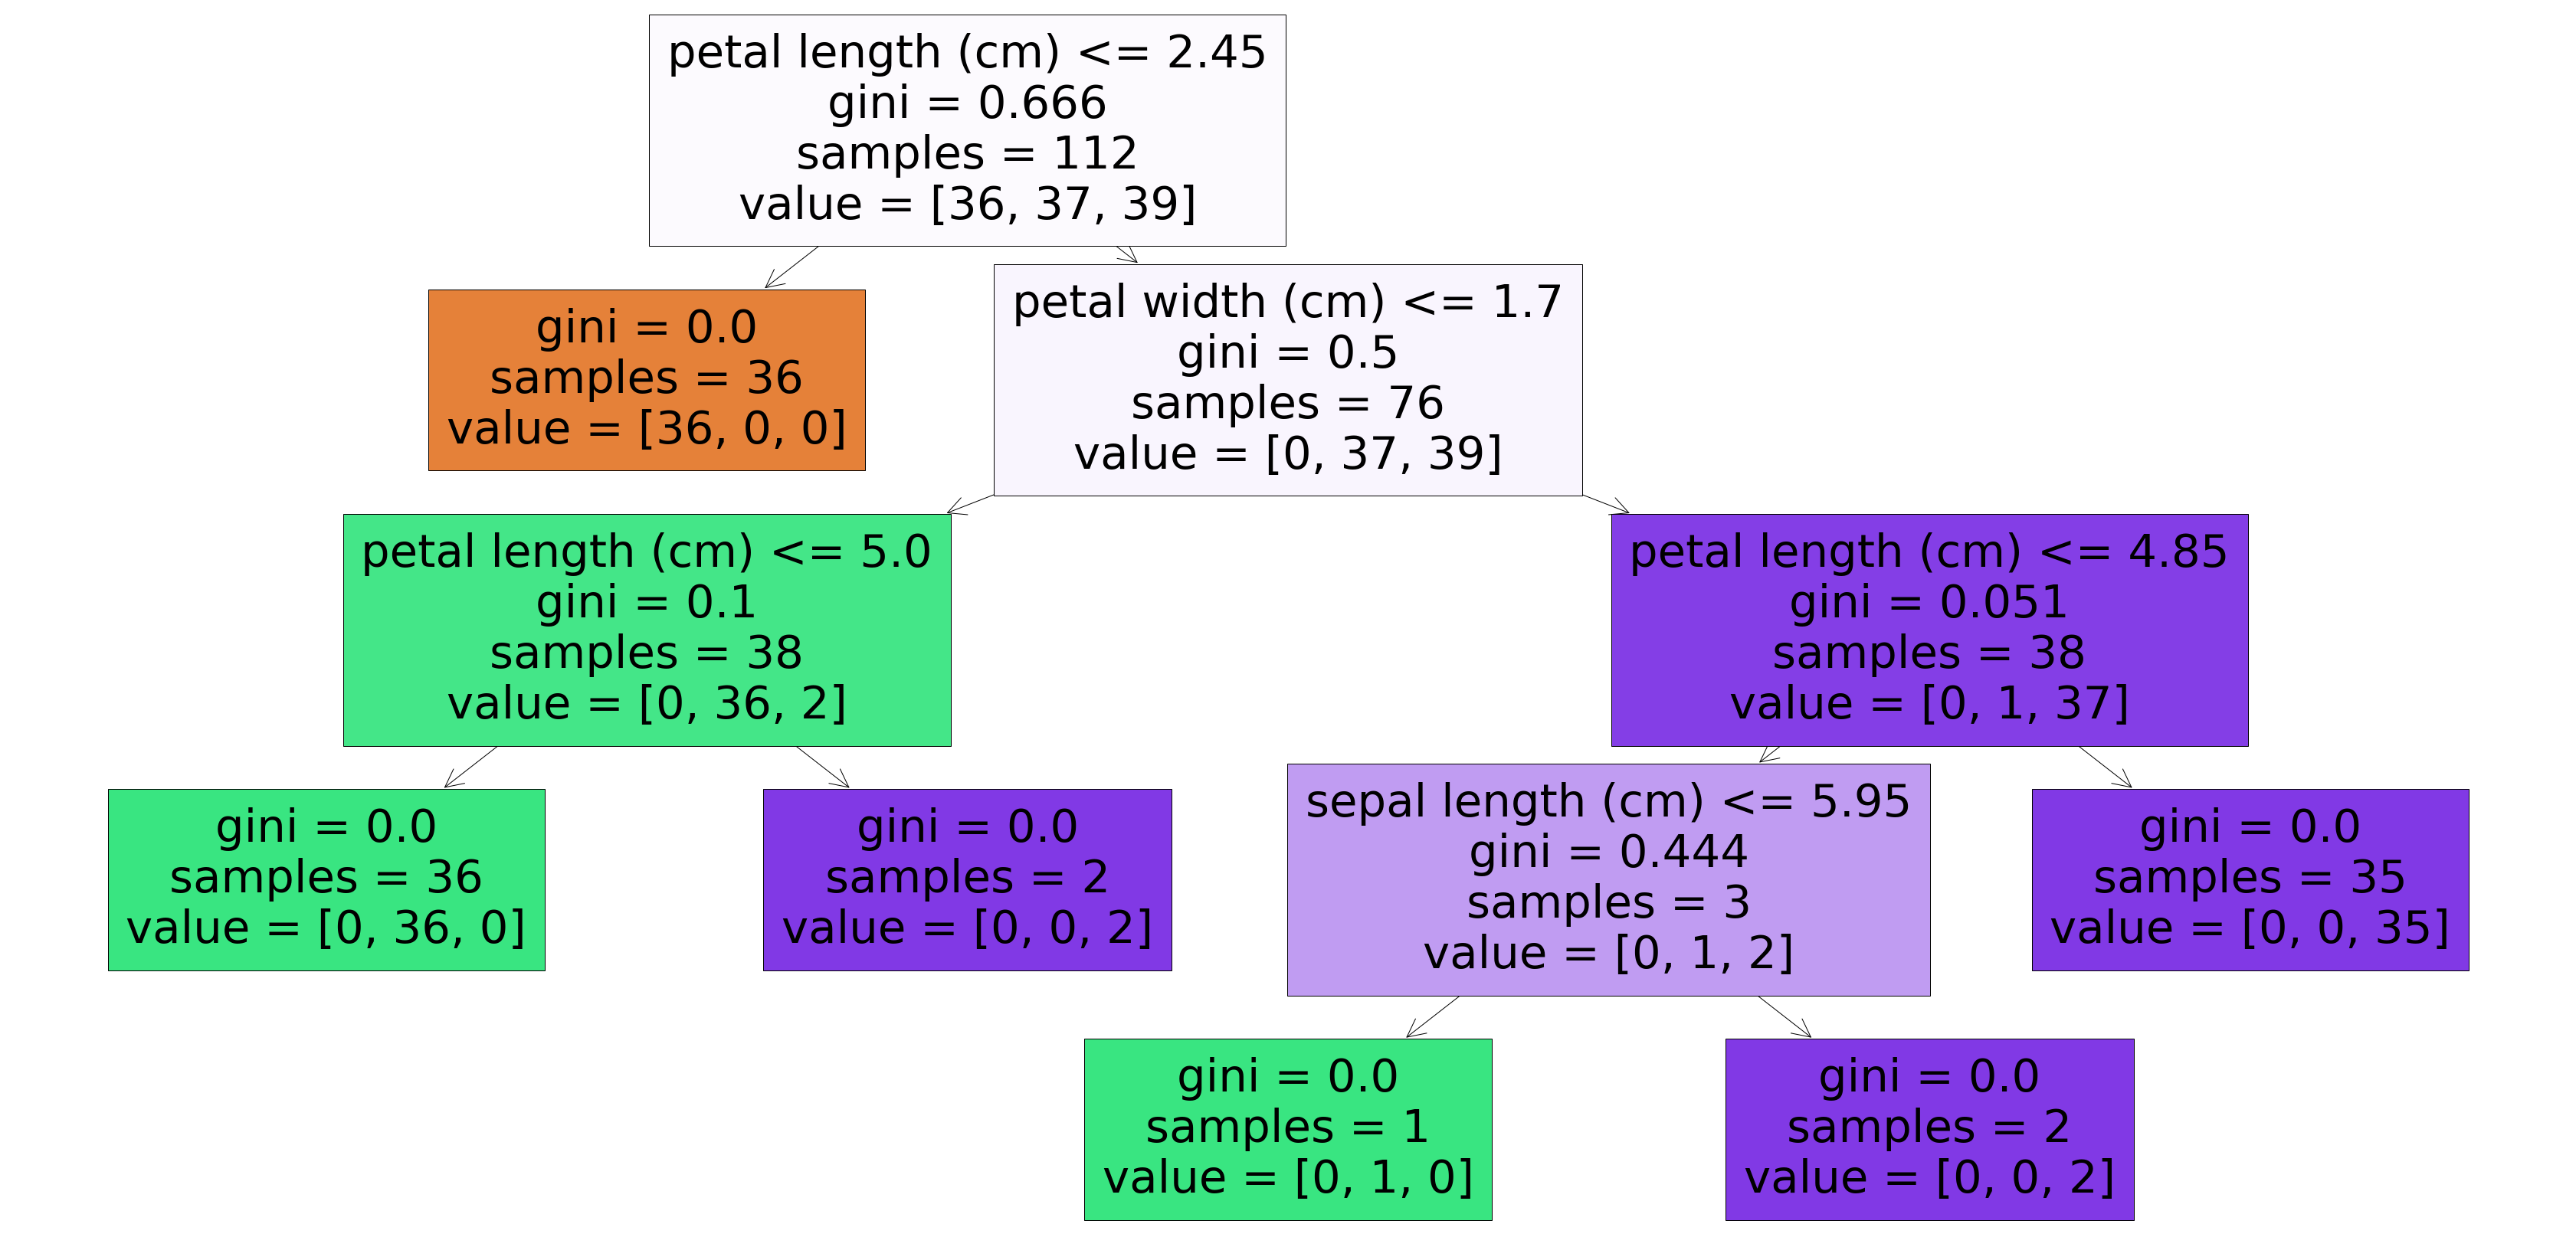

In [ ]:
plt.figure(figsize=(60,30))
plot_tree(dt, filled=True, feature_names = iris.feature_names)

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
dt.feature_importances_

array([0.01786711, 0.        , 0.5501484 , 0.43198448])

In [ ]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['TARGET'] = boston.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
input = boston.data
output = df['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(train_input, train_output)

DecisionTreeRegressor()

In [ ]:
dt.score(test_input, test_output)

0.7487123945312122

In [ ]:
np.corrcoef(dt.predict(test_input), test_output)

array([[1.       , 0.8745316],
       [0.8745316, 1.       ]])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dt.predict(test_input), test_output)
mse

20.131889763779526

In [ ]:
nmse = mse/np.max(test_output) 
nmse

0.4026377952755905

[Text(0.5, 0.875, 'RM <= 6.941\nsquared_error = 85.856\nsamples = 379\nvalue = 22.494'),
 Text(0.25, 0.625, 'LSTAT <= 14.4\nsquared_error = 38.622\nsamples = 319\nvalue = 19.724'),
 Text(0.125, 0.375, 'DIS <= 1.385\nsquared_error = 25.73\nsamples = 189\nvalue = 23.018'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'CRIM <= 7.465\nsquared_error = 18.667\nsamples = 130\nvalue = 14.936'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RM <= 7.437\nsquared_error = 79.298\nsamples = 60\nvalue = 37.222'),
 Text(0.625, 0.375, 'NOX <= 0.659\nsquared_error = 46.673\nsamples = 38\nvalue = 32.271'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'RAD <= 3.5\nsquared_error = 20.197\nsamples = 22\nvalue = 45.773'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

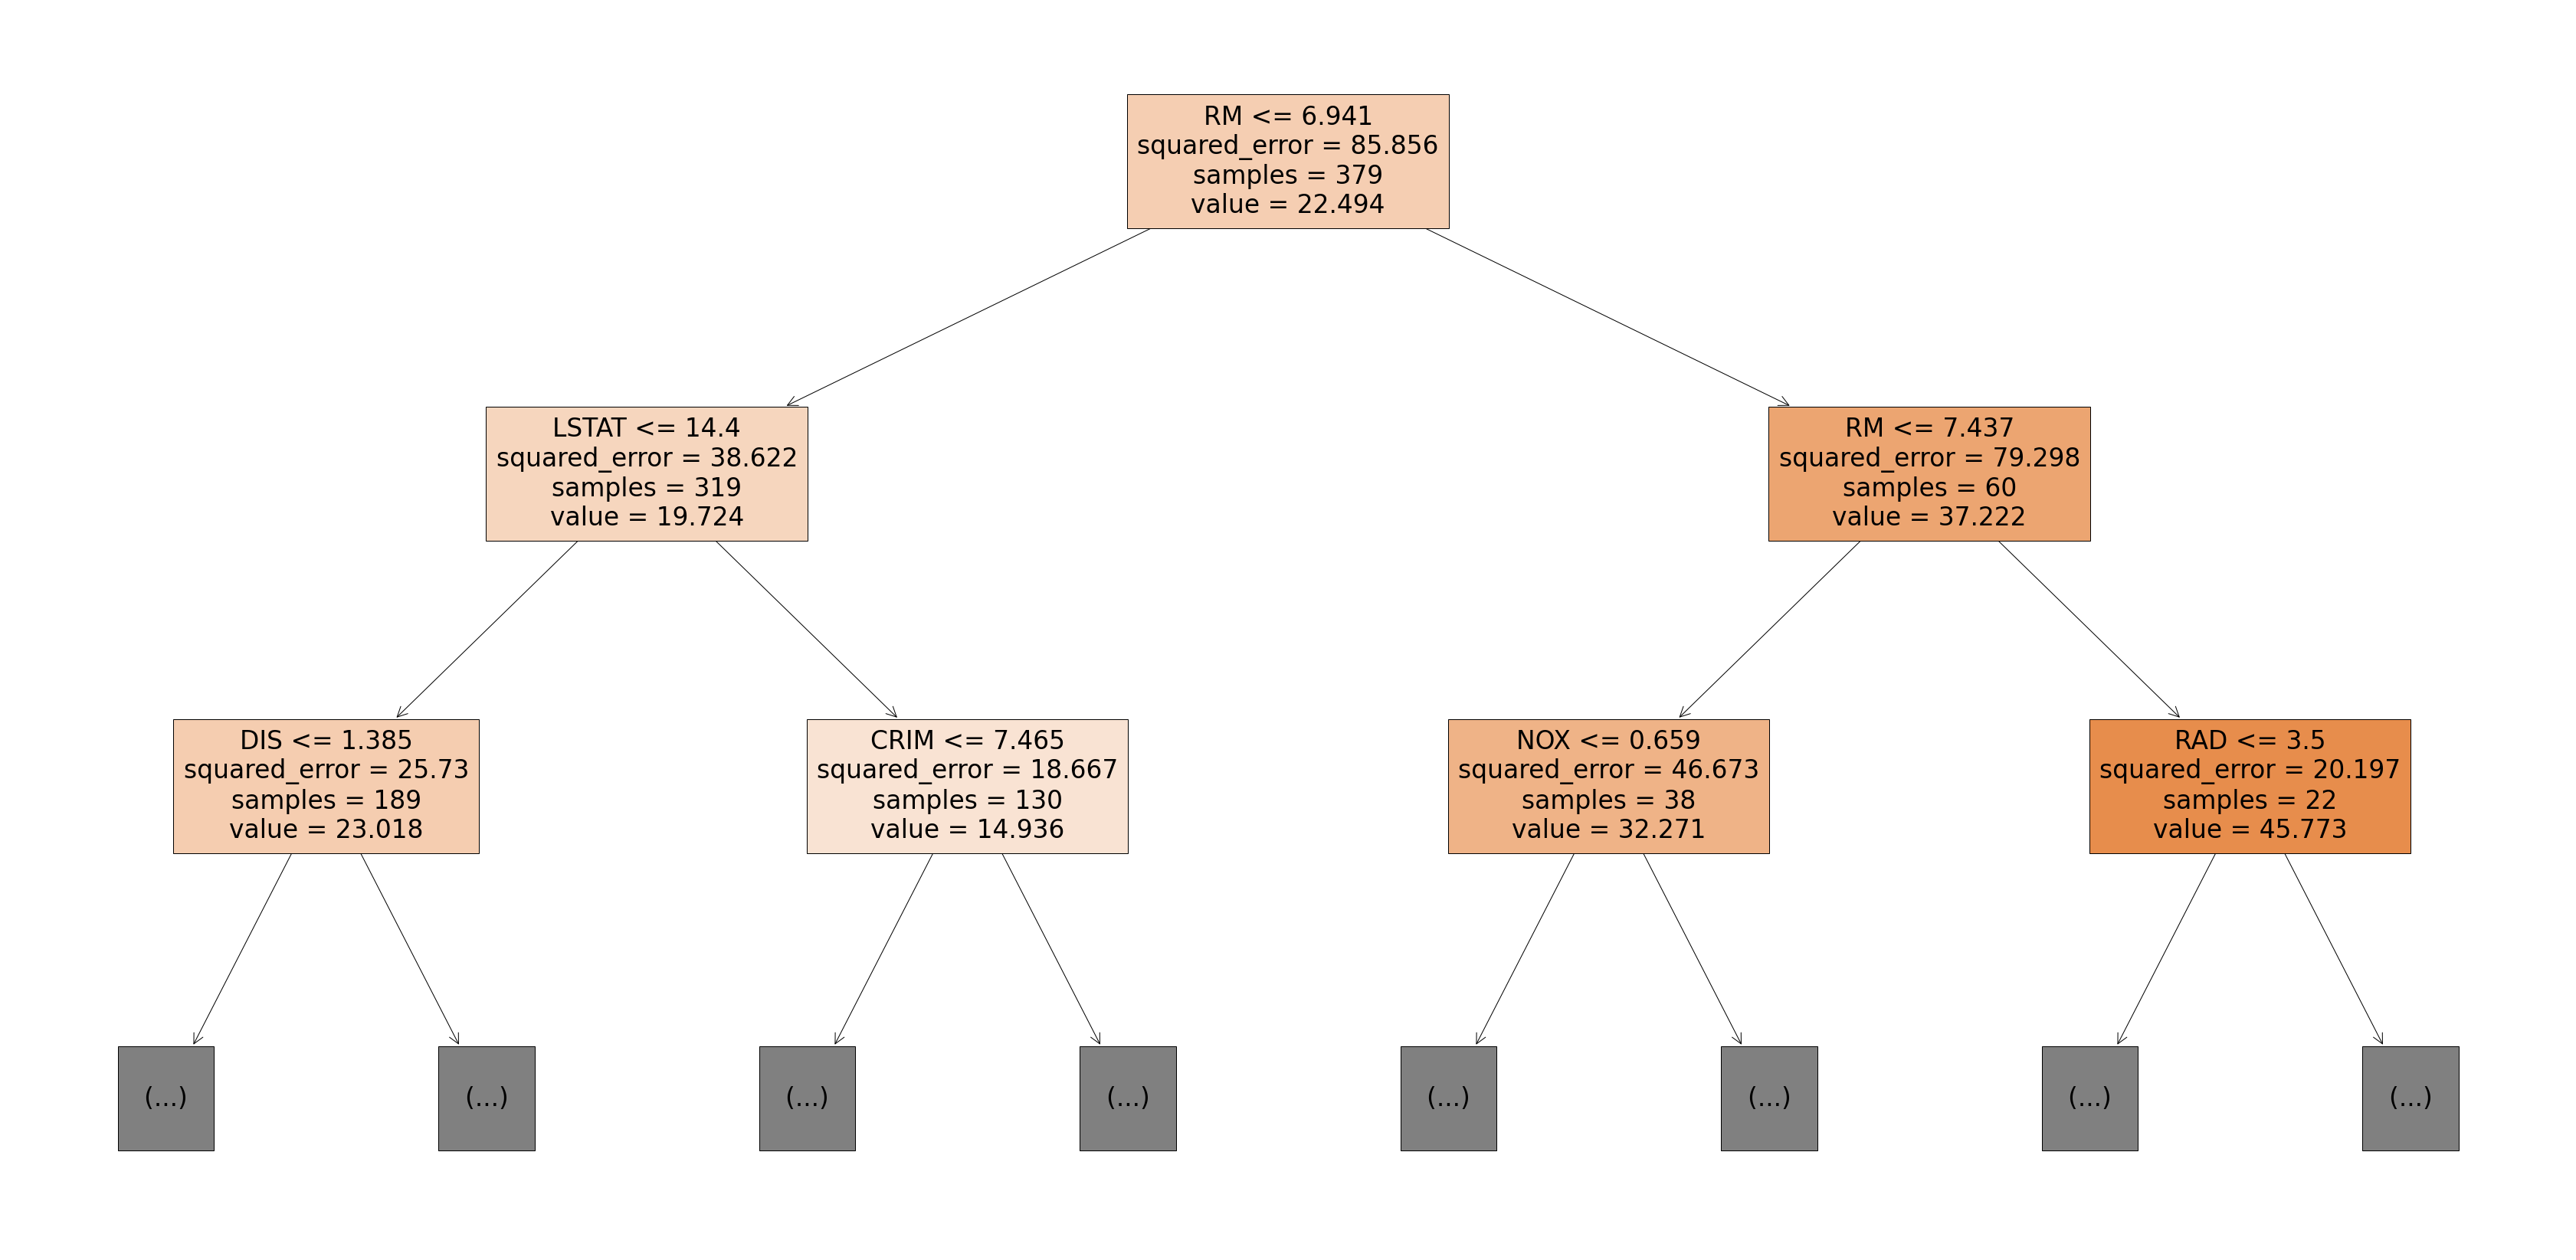

In [ ]:
plt.figure(figsize=(60,30))
plot_tree(dt, max_depth=2, filled=True, feature_names = boston.feature_names)

In [ ]:
dt.feature_importances_

array([3.89347812e-02, 6.61188295e-04, 5.81221714e-03, 1.41776499e-04,
       4.49106414e-02, 5.71360081e-01, 8.93427895e-03, 8.02456461e-02,
       6.24507709e-03, 7.80997420e-03, 4.12271489e-03, 7.99357261e-03,
       2.22828051e-01])

In [ ]:
np.argmax(dt.feature_importances_)

5

In [ ]:
boston.feature_names[5]

'RM'

In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
data = pdr.get_data_yahoo('FB', start="2021-03-03", end="2022-03-03")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-03,260.290009,260.989990,255.100006,255.410004,255.410004,15513500
2021-03-04,256.470001,266.489990,253.500000,257.640015,257.640015,31626500
2021-03-05,260.670013,265.450012,255.610001,264.279999,264.279999,26820100
2021-03-08,265.549988,265.579987,255.050003,255.309998,255.309998,18391800
2021-03-09,261.179993,268.529999,259.809998,265.739990,265.739990,22039700


In [ ]:
open = np.array(data['Open'])
high = np.array(data['High'])
low = np.array(data['Low'])
close = np.array(data['Close'])
adj = np.array(data['Adj Close'])

In [ ]:
input = np.column_stack((open, high, low, close))
output = adj

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

In [ ]:
ls = Sequential()
ls.add(LSTM(200, input_shape=(4, 1)))
ls.add(Dense(150, activation='relu'))
ls.add(Dense(1))
ls.compile(loss='mse', metrics='mae', optimizer='adam')

In [ ]:
ls.fit(train_input, train_output, epochs=100)

Epoch 1/100
6/6 [==============================] - 4s 18ms/step - loss: 104803.3516 - mae: 321.4256
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 103307.7266 - mae: 319.0847
Epoch 3/100
6/6 [==============================] - 0s 21ms/step - loss: 101797.2578 - mae: 316.7012
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 99946.4766 - mae: 313.7904
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 97691.7266 - mae: 310.1353
Epoch 6/100
6/6 [==============================] - 0s 20ms/step - loss: 94370.6641 - mae: 304.7440
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 89807.7891 - mae: 297.1202
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 84524.4688 - mae: 288.1180
Epoch 9/100
6/6 [==============================] - 0s 15ms/step - loss: 78813.3750 - mae: 277.9842
Epoch 10/100
6/6 [==============================] - 0s 22ms/step - loss: 72096.2422 - mae: 265.5839
Epoch 

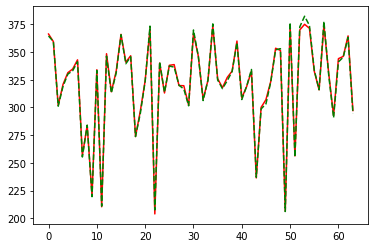

In [ ]:
plt.plot(ls.predict(test_input), 'r')
plt.plot(test_output, 'g--')

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(200, input_shape=(4, 1)))
rnn.add(Dense(150, activation='relu'))
rnn.add(Dense(1))
rnn.compile(loss='mse', metrics='mae', optimizer='adam')

In [ ]:
rnn.fit(train_input, train_output, epochs=100)

Epoch 1/100
6/6 [==============================] - 2s 9ms/step - loss: 103788.0078 - mae: 319.8178
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 98827.8438 - mae: 311.9980
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 94695.2188 - mae: 305.2966
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 90284.7266 - mae: 297.9956
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 85558.3203 - mae: 289.9017
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 80380.0625 - mae: 280.8613
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 74832.4141 - mae: 270.8690
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 69047.7812 - mae: 259.9058
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 63003.7031 - mae: 247.9903
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 56831.1641 - mae: 235.1761
Epoch 11/100
6/6 

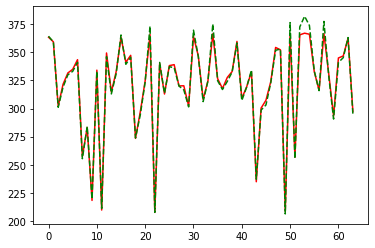

In [ ]:
plt.plot(rnn.predict(test_input), 'r')
plt.plot(test_output, 'g--')

**2022 - 3 - 24**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
input = iris.data
output = df['flower']

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input, output)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(train_input, train_output)

RandomForestClassifier()

In [ ]:
rf.score(test_input, test_output)

0.9736842105263158

In [ ]:
rf.score(val_input, val_output)

0.9166666666666666

In [ ]:
rf.feature_importances_

array([0.09280207, 0.02404065, 0.45605823, 0.42709905])

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(rf.filled=True, feature_names = iris.feature_names)
# error

SyntaxError: ignored

In [ ]:
from sklearn.tree import export_graphviz
rf_sample = rf.estimators_[0]
rf_sample

DecisionTreeClassifier(max_features='auto', random_state=1420086335)

[Text(0.375, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.664\nsamples = 62\nvalue = [33, 37, 30]'),
 Text(0.2916666666666667, 0.75, 'gini = 0.0\nsamples = 18\nvalue = [33, 0, 0]'),
 Text(0.4583333333333333, 0.75, 'petal length (cm) <= 4.75\ngini = 0.495\nsamples = 44\nvalue = [0, 37, 30]'),
 Text(0.25, 0.5833333333333334, 'sepal width (cm) <= 2.55\ngini = 0.057\nsamples = 22\nvalue = [0, 33, 1]'),
 Text(0.16666666666666666, 0.4166666666666667, 'petal width (cm) <= 1.6\ngini = 0.198\nsamples = 6\nvalue = [0, 8, 1]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 8, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 16\nvalue = [0, 25, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'sepal length (cm) <= 5.95\ngini = 0.213\nsamples = 22\nvalue = [0, 4, 29]'),
 Text(0.5, 0.4166666666666667, 'sepal length (cm) <= 5.85\ngini = 0.444\nsamples = 2\nvalue = [0, 2, 1]

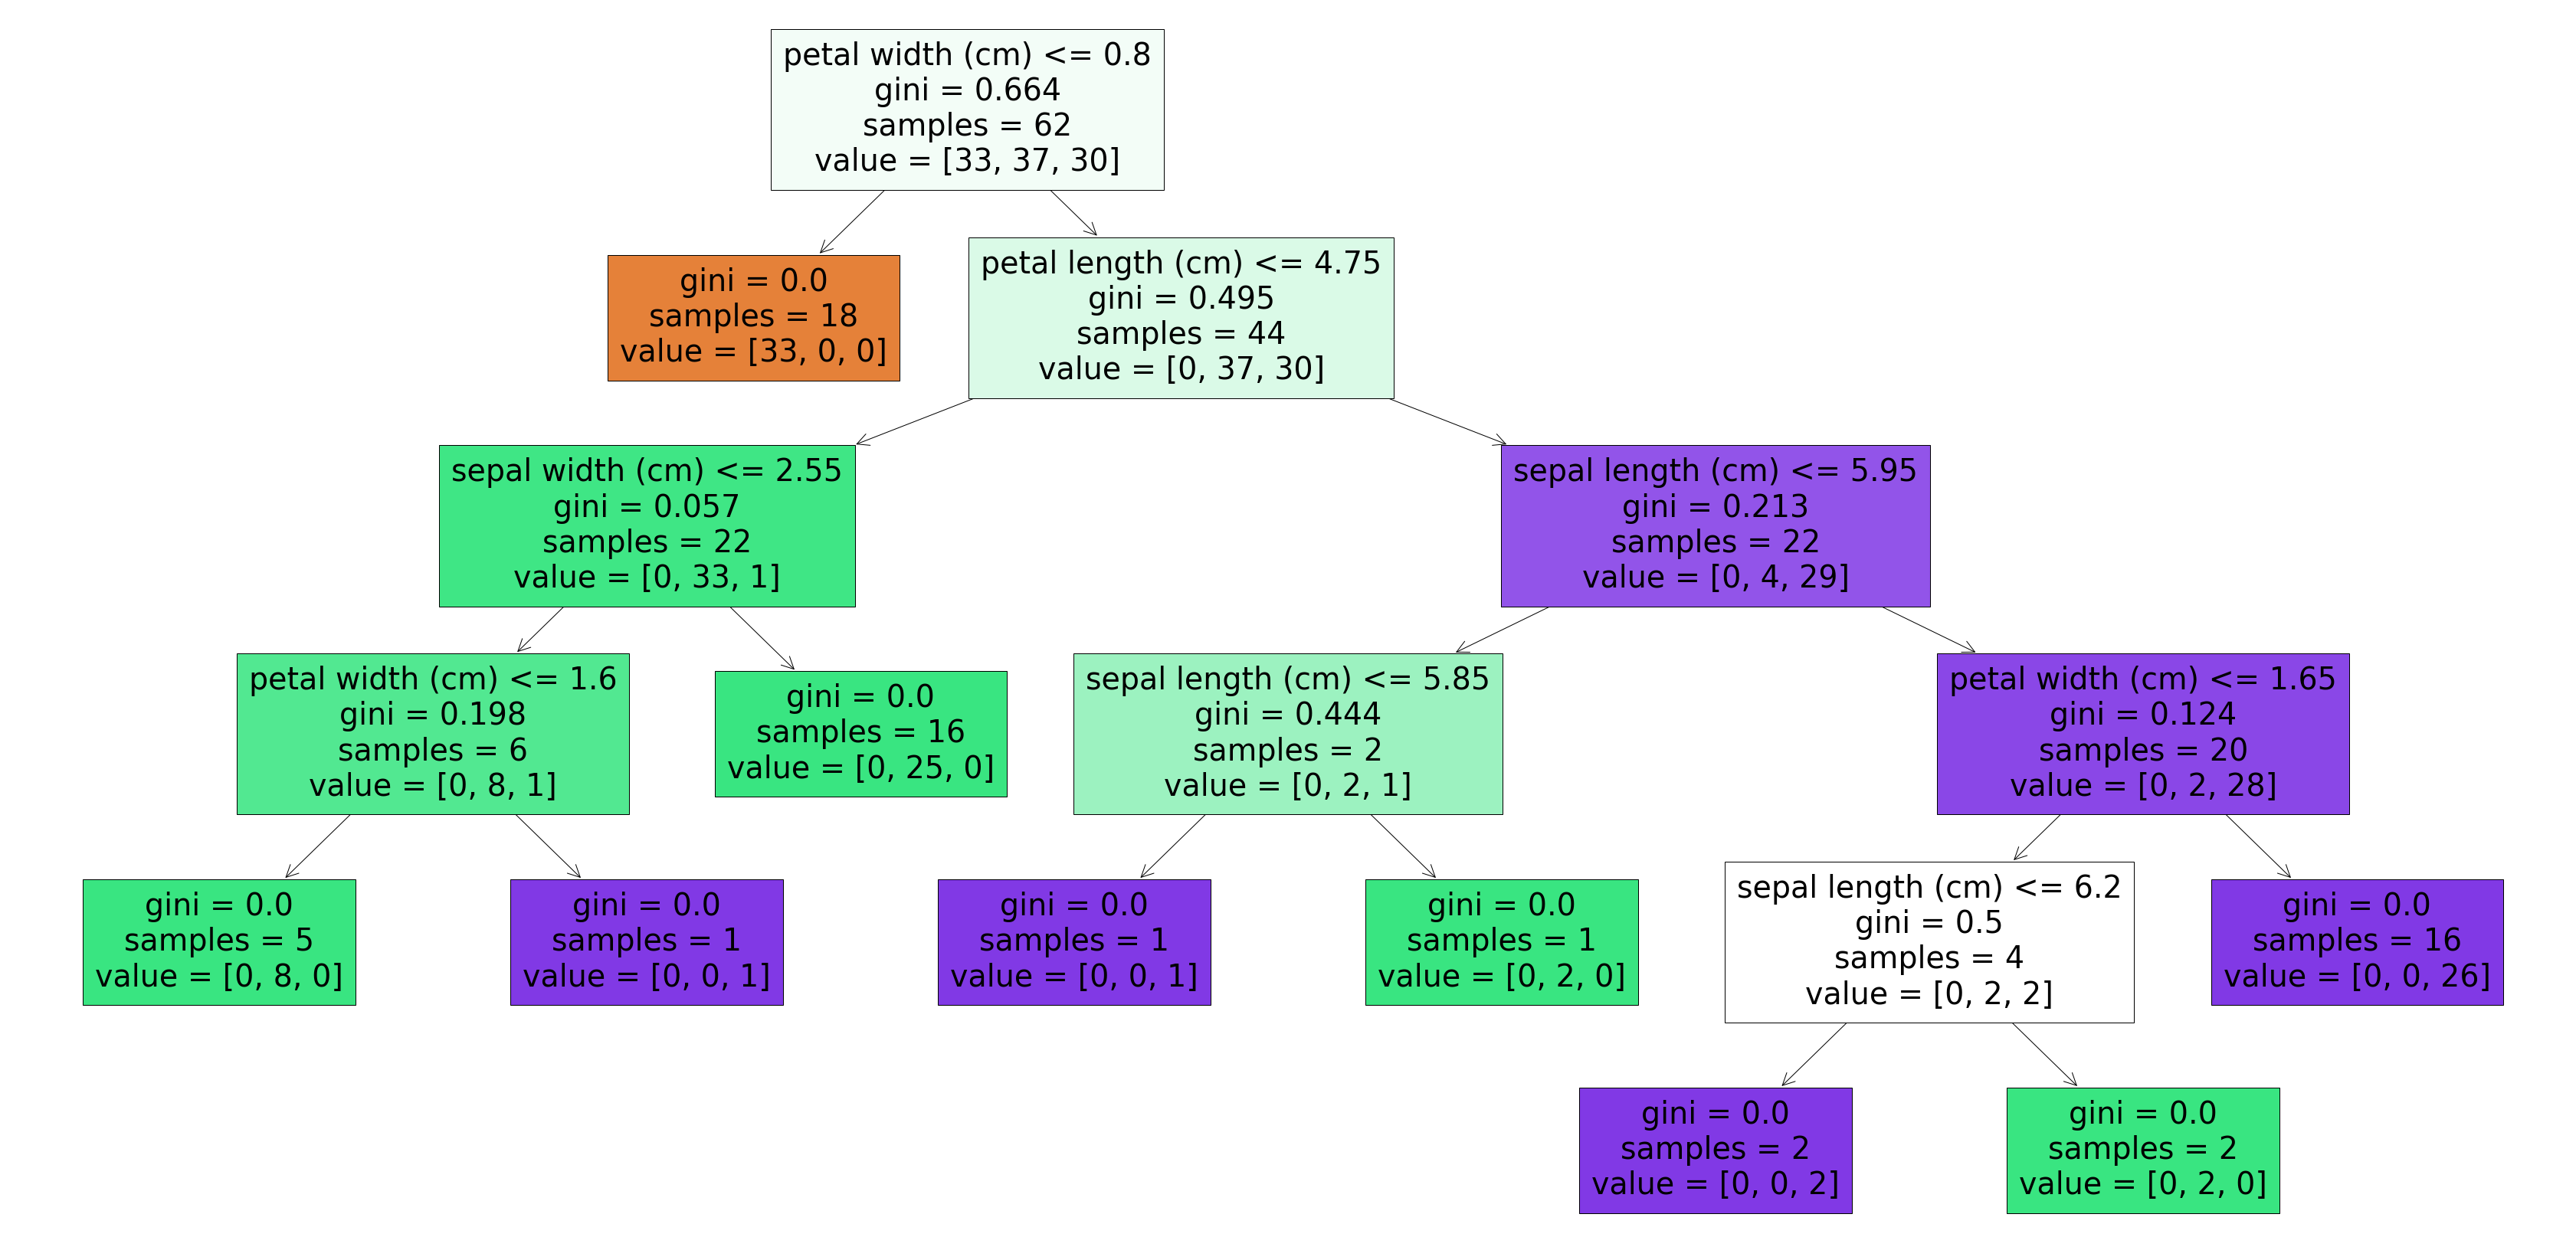

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(rf_sample, filled=True, feature_names=iris.feature_names)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
boston = datasets.load_boston()
df2 = pd.DataFrame(boston.data, columns=boston.feature_names)
df2['price'] = boston.target
df2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
input2 = boston.data
output2 = df2['price']

In [ ]:
train_input2, test_input2, train_output2, test_output2 = train_test_split(input2, output2)

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(train_input2, train_output2)

RandomForestRegressor()

In [ ]:
np.corrcoef(rfr.predict(test_input2), test_output2)

array([[1.       , 0.9476361],
       [0.9476361, 1.       ]])

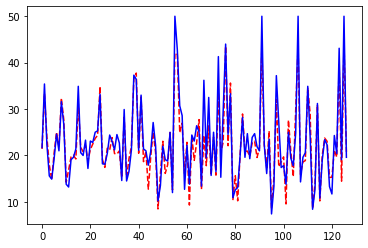

In [ ]:
plt.plot(range(len(test_input2)), rfr.predict(test_input2), 'r--')
plt.plot(range(len(test_input2)), test_output2, 'b')

In [ ]:
# CNN - Convolution N N - 합성곱 : 필요한 부분을 강조해준다

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_input, train_output), (test_input, test_output) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

In [ ]:
train_input.shape, test_input.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(1, kernel_size=3, padding='same',input_shape=(28, 28, 1), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(100, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 1)         10        
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,520
Trainable params: 79,520
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.fit(train_input, train_output, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 1.2973 - accuracy: 0.8153
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2738 - accuracy: 0.9202
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2008 - accuracy: 0.9414
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1612 - accuracy: 0.9520
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1381 - accuracy: 0.9581
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1168 - accuracy: 0.9639
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1033 - accuracy: 0.9677
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0898 - accuracy: 0.9718
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0824 - accuracy: 0.9743
Epoch 10/10
1875/1875 [==============================] - 26s 14ms/

In [ ]:
cnn.evaluate(test_input, test_output)

313/313 [==============================] - 2s 5ms/step - loss: 0.1849 - accuracy: 0.9512


[0.18490010499954224, 0.951200008392334]

**2022 - 3 - 25**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(train_input, train_output), (test_input, test_output) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.layers.pooling import MaxPooling2D

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(1, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
cnn.add(MaxPooling2D(2))

cnn.add(Flatten())
cnn.add(Dense(100, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 1)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 196)               0         
                                                                 
 dense (Dense)               (None, 100)               19700     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 20,720
Trainable params: 20,720
Non-trainable params: 0
____________________________________________________

In [ ]:
cnn.fit(train_input, train_output, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 1.6093 - accuracy: 0.8020
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3455 - accuracy: 0.8968
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2399 - accuracy: 0.9257
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1832 - accuracy: 0.9424
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1498 - accuracy: 0.9520
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1295 - accuracy: 0.9585
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1109 - accuracy: 0.9640
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0968 - accuracy: 0.9681
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0872 - accuracy: 0.9711
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step 

In [ ]:
cnn.fit(train_input, train_output, epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 24s 19ms/step - loss: 0.0560 - accuracy: 0.9818
Epoch 2/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0527 - accuracy: 0.9821
Epoch 3/10
1200/1200 [==============================] - 23s 19ms/step - loss: 0.0521 - accuracy: 0.9820
Epoch 4/10
1200/1200 [==============================] - 22s 19ms/step - loss: 0.0490 - accuracy: 0.9831
Epoch 5/10
1200/1200 [==============================] - 20s 16ms/step - loss: 0.0448 - accuracy: 0.9844
Epoch 6/10
1200/1200 [==============================] - 15s 12ms/step - loss: 0.0403 - accuracy: 0.9858
Epoch 7/10
1200/1200 [==============================] - 15s 12ms/step - loss: 0.0400 - accuracy: 0.9860
Epoch 8/10
1200/1200 [==============================] - 15s 12ms/step - loss: 0.0355 - accuracy: 0.9875
Epoch 9/10
1200/1200 [==============================] - 15s 12ms/step - loss: 0.0361 - accuracy: 0.9877
Epoch 10/10
1200/1200 [==============================] - 15s 12m

In [ ]:
import cv2
test = cv2.imread("/content/number.jpg", cv2.IMREAD_GRAYSCALE)

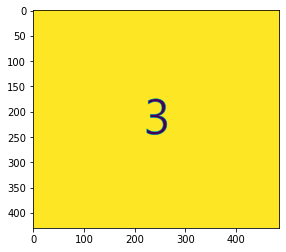

In [ ]:
plt.imshow(test)

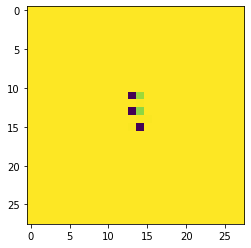

In [ ]:
test_resized = cv2.resize(test, (28, 28))
plt.imshow(test_resized)

In [ ]:
test_resized

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [ ]:
test_resized_re = 255 - test_resized 
test_resized_re

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

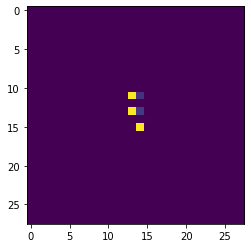

In [ ]:
plt.imshow(test_resized_re)

In [ ]:
test_resized_re[test_resized_re<200] = 0

In [ ]:
test_resized_re_r = test_resized_re.reshape(-1, 28, 28)

In [ ]:
cnn.predict(test_resized_re_r)

array([[2.7697257e-15, 2.3592117e-10, 5.5218157e-19, 6.0602639e-07,
        9.9999905e-01, 2.5648280e-08, 1.2778048e-10, 2.1554929e-08,
        3.3499001e-14, 4.0191892e-07]], dtype=float32)

In [ ]:
np.argmax(cnn.predict(test_resized_re_r))

4

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1)
pc = pca.fit_transform(iris.data)

In [ ]:
pc

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654],
       [-2.28085963],
       [-2.82053775],
       [-2.62614497],
       [-2.88638273],
       [-2.6727558 ],
       [-2.50694709],
       [-2.61275523],
       [-2.78610927],
       [-3.22380374],
       [-2.64475039],
       [-2.38603903],
       [-2.62352788],
       [-2.64829671],
       [-2.19982032],
       [-2.5879864 ],
       [-2.31025622],
       [-2.54370523],
       [-3.21593942],
       [-2.30273318],
       [-2.35575405],
       [-2.50666891],
       [-2.46882007],
       [-2.56231991],
       [-2.63953472],
       [-2.63198939],
       [-2.58739848],
       [-2.4099325 ],
       [-2.64886233],
       [-2.59873675],
       [-2.63692688],
       [-2.86624165],
       [-2.62523805],
       [-2.80068412],
       [-2.98050204],
       [-2.59000631],
       [-2.77010243],
       [-2.84936871],
       [-2.99740655],
       [-2.40561449],
       [-2.20948924],
       [-2

In [ ]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use(['seaborn-whitegrid'])

In [ ]:
model = LinearRegression(normalize=True)

In [ ]:
rm = df['RM']
rm = np.array(rm)
rm = rm.reshape(-1,1)

In [ ]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rm, boston.target, test_size=0.3)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.48279902117905116
평가 데이터 점수 : 0.4767776069505193


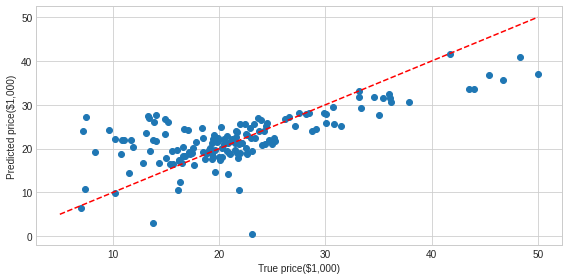

In [ ]:
predicted = model.predict(X_test) 
expected = y_test 

plt.figure(figsize=(8, 4))
plt.scatter(expected, predicted)
plt.plot([5, 50],[5, 50], '--r')
plt.xlabel("True price($1,000)")
plt.ylabel("Predicted price($1,000)")
plt.tight_layout()

**2022 - 3 - 29**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['price'] = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
input = df['RM']
output = df['price']

In [ ]:
input = np.array(input)
output = np.array(output)

In [ ]:
input = input.reshape(-1, 1)
output = output.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(train_input, train_output)

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([[8.71268366]]), array([-32.42314948]))

In [ ]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['degree'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,degree
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
input = diabetes.data
output = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
from sklearn.linear_model import Ridge
rg = Ridge(alpha=0.1)

In [ ]:
rg.fit(train_input, train_output)

Ridge(alpha=0.1)

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
rg.coef_

array([  17.83524436, -233.14151054,  419.2391487 ,  310.72655059,
        -32.2409417 ,  -97.12240518, -181.02014091,  119.05047091,
        491.91792848,   80.00699342])

In [ ]:
diabetes.feature_names[8]

's5'

In [ ]:
np.corrcoef(rg.predict(test_input), test_output)

array([[1.        , 0.67388374],
       [0.67388374, 1.        ]])

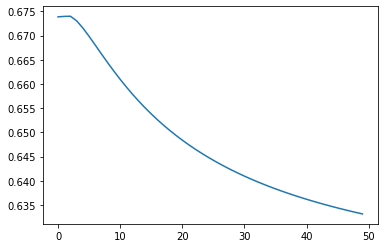

In [ ]:
rg_corr = []
i_num = 0
for i in np.arange(0.01, 5, 0.1):
  rg = Ridge(alpha=i)
  rg.fit(train_input, train_output)
  rg_corr.append(np.corrcoef(rg.predict(test_input), test_output)[0][1])
  i_num += 1
plt.plot(range(i_num), rg_corr);

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)

In [ ]:
ls.fit(train_input, train_output)

Lasso(alpha=0.1)

In [ ]:
ls.coef_

array([   0.        , -197.93676977,  440.99226045,  299.66340844,
        -37.4734029 ,   -0.        , -195.57121471,    0.        ,
        571.48035107,   22.28040328])

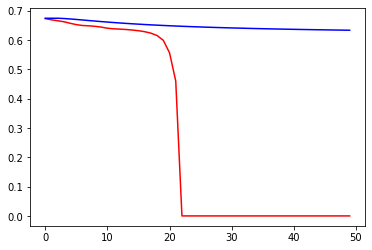

In [ ]:
ls_corr = []
i_num = 0
for i in np.arange(0.01, 5, 0.1):
  ls = Lasso(alpha=i)
  ls.fit(train_input, train_output)
  ls_corr.append(np.corrcoef(ls.predict(test_input), test_output)[0][1])
  i_num += 1
plt.plot(range(i_num), ls_corr, 'r')
plt.plot(range(i_num), rg_corr, 'b');

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**2022 - 3 - 31**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['price'] = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
input = boston.data
output = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
xgb = XGBClassifier(reg_alpha=3)
# reg_alpha = L1 규제, reg_lambda = L2 규제

In [ ]:
xgb.fit(train_input, train_output)

XGBClassifier(objective='multi:softprob', reg_alpha=3)

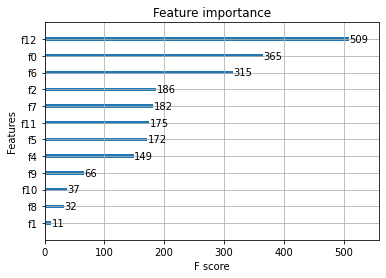

In [ ]:
plot_importance(xgb);

[Text(0, 0, 'CRIM'),
 Text(0, 0, 'ZN'),
 Text(0, 0, 'INDUS'),
 Text(0, 0, 'CHAS'),
 Text(0, 0, 'NOX')]

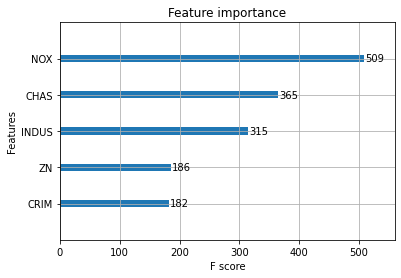

In [ ]:
plot_importance(xgb, max_num_features = 5).set_yticklabels(boston.feature_names)

In [ ]:
np.corrcoef(xgb.predict(test_input), test_output)

array([[1.        , 0.73232509],
       [0.73232509, 1.        ]])

In [ ]:
import cv2

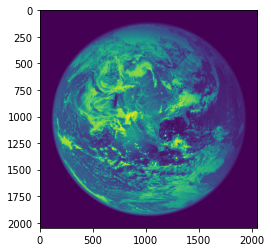

In [ ]:
image = cv2.imread('/content/earth.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image);

In [ ]:
image.shape

(2048, 2048)

In [ ]:
image2 = image.reshape(1, -1)

In [ ]:
image2

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
image2.shape

(1, 4194304)

In [ ]:
image2_rev = image2/255

In [ ]:
threshold = 0.8
image2_rev[image2_rev < threshold] = 0

In [ ]:
image2_rev

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
image2_rev = image2_rev * 255

In [ ]:
image2_rev = image2_rev.reshape(2048, 2048)

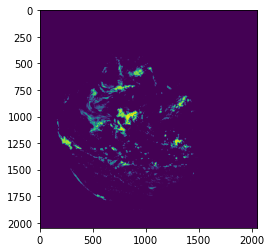

In [ ]:
plt.imshow(image2_rev);

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)

In [ ]:
ls.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
ls.coef_

array([  -0.        , -167.89374743,  412.29455096,  287.35478262,
         -0.        ,  -55.13187594, -272.15195197,    0.        ,
        501.84903439,   29.91554795])

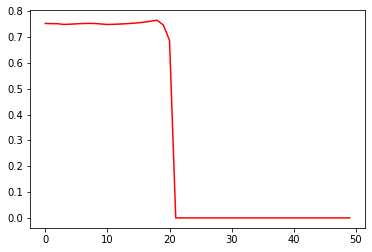

In [ ]:
ls_corr = []
i_num = 0
for i in np.arange(0.01, 5, 0.1):
  ls = Lasso(alpha=i)
  ls.fit(X_train, y_train)
  ls_corr.append(np.corrcoef(ls.predict(X_test), y_test)[0][1])
  i_num += 1
plt.plot(range(i_num), ls_corr, 'r')

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
xgb = XGBClassifier(reg_alpha=3)
# reg_alpha = L1 규제, reg_lambda = L2 규제

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob', reg_alpha=3)

[Text(0, 0, 'age'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'bmi'),
 Text(0, 0, 'bp'),
 Text(0, 0, 's1')]

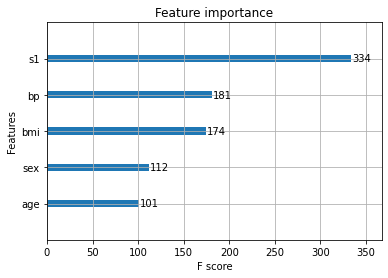

In [ ]:
plot_importance(xgb, max_num_features = 5).set_yticklabels(diabetes.feature_names)

In [ ]:
np.corrcoef(xgb.predict(X_test), y_test)

array([[1.        , 0.32016888],
       [0.32016888, 1.        ]])

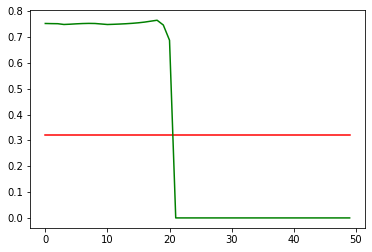

In [ ]:
xgb_corr = []
i_num = 0
for i in np.arange(0.01, 5, 0.1):
  xgb = XGBClassifier(reg_alpha=3)
  xgb.fit(X_train, y_train)
  xgb_corr.append(np.corrcoef(xgb.predict(X_test), y_test)[0][1])
  i_num += 1
plt.plot(range(i_num), xgb_corr, 'r')
plt.plot(range(i_num), ls_corr, 'g')

**2022 - 4 - 5**

In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
data = pdr.get_data_yahoo('ATVI', start='2021-01-01', end='2022-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.699997,92.910004,89.220001,89.900002,89.466812,7423100
2021-01-05,90.320000,90.750000,89.099998,90.690002,90.253006,4544100
2021-01-06,89.059998,89.900002,87.889999,88.000000,87.575966,7422100
2021-01-07,88.860001,90.750000,88.269997,89.669998,89.237915,6142200
2021-01-08,90.070000,91.370003,89.529999,91.300003,90.860069,4408800


In [ ]:
op = np.array(data['Open'])
hi = np.array(data['High'])
lo = np.array(data['Low'])
cl = np.array(data['Close'])
adj = np.array(data['Adj Close'])
v = np.array(data['Volume'])

In [ ]:
input = np.column_stack((op, hi, lo, cl, v))
output = adj

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_scaled = ss.fit_transform(input)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(input_scaled, output)

In [ ]:
from xgboost import XGBClassifier, plot_importance, XGBRegressor

In [ ]:
xgb = XGBClassifier(max_depth=5, reg_alpha=0.1) # reg_lambda
# L1 규제 - 낮은 규제, 높은 규제 - Lasso
# L2 규제 - 지나치게 커짐 방지 - Ridge - 미분가능
xgbr = XGBRegressor(max_depth=5, reg_alpha=0.1)

In [ ]:
xgb.fit(train_input, train_output)
xgbr.fit(train_input, train_output)

[10:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, reg_alpha=0.1)

In [ ]:
xgb.score(test_input, test_output)
# continuous is not supported

ValueError: ignored

In [ ]:
np.corrcoef(xgb.predict(test_input), test_output)

array([[1.        , 0.75412439],
       [0.75412439, 1.        ]])

[Text(0, 0, 'Open'),
 Text(0, 0, 'High'),
 Text(0, 0, 'Low'),
 Text(0, 0, 'Close'),
 Text(0, 0, 'Volume')]

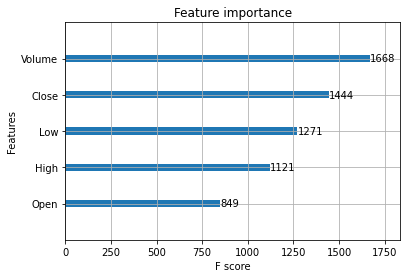

In [ ]:
plot_importance(xgb).set_yticklabels(['Open','High','Low','Close','Volume'])

In [ ]:
test_input[0]

array([ 0.99909474,  0.95428667,  1.00408267,  0.95309171, -0.88331144])

In [ ]:
xgb.predict([0.7, 0.8, 0.9, 1.0, 0.4])

array([96.56999969])

In [ ]:
a = 0.7
b = 0.8
c = 0.9
d = 1.0
e = 0.4

In [ ]:
xgb.predict([a,b,c,d,e])

array([96.56999969])

**2022 - 4 - 8**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = [1,2,3,1,2,7,6,8,7]
Y = [2,1,1,3,2,7,8,6,6]

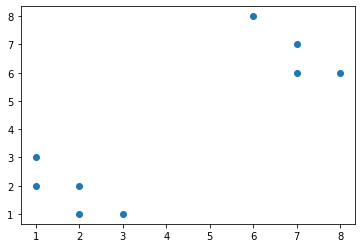

In [ ]:
plt.scatter(X,Y);

In [ ]:
input = np.column_stack((X,Y))
input

array([[1, 2],
       [2, 1],
       [3, 1],
       [1, 3],
       [2, 2],
       [7, 7],
       [6, 8],
       [8, 6],
       [7, 6]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=2)

In [ ]:
km.fit(input)

KMeans(n_clusters=2)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import linkage # <- kmeans 성능이 개판일때 쓰면 댐(ward)

In [ ]:
input_linked = linkage(input, 'ward') # ward - 가장 hot한 기법

In [ ]:
input_linked

array([[ 0.        ,  3.        ,  1.        ,  2.        ],
       [ 1.        ,  2.        ,  1.        ,  2.        ],
       [ 5.        ,  8.        ,  1.        ,  2.        ],
       [ 4.        , 10.        ,  1.29099445,  3.        ],
       [ 7.        , 11.        ,  1.29099445,  3.        ],
       [ 6.        , 13.        ,  2.61406452,  4.        ],
       [ 9.        , 12.        ,  2.74469185,  5.        ],
       [14.        , 15.        , 15.13531558,  9.        ]])

In [ ]:
from scipy.cluster.hierarchy import dendrogram # - 대진표

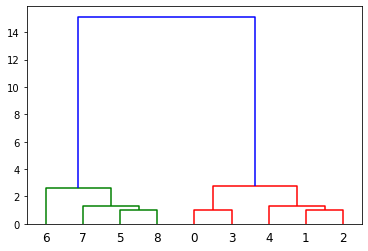

In [ ]:
dendrogram(input_linked)
plt.show()

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
input = diabetes.data

In [ ]:
input_linked = linkage(input, 'ward') 

In [ ]:
input_linked

array([[6.80000000e+01, 1.05000000e+02, 2.27161305e-02, 2.00000000e+00],
       [1.40000000e+02, 2.71000000e+02, 2.99318135e-02, 2.00000000e+00],
       [2.31000000e+02, 2.74000000e+02, 3.23811751e-02, 2.00000000e+00],
       ...,
       [8.75000000e+02, 8.76000000e+02, 9.89896127e-01, 1.67000000e+02],
       [8.78000000e+02, 8.80000000e+02, 1.31644431e+00, 2.85000000e+02],
       [8.79000000e+02, 8.81000000e+02, 2.08372501e+00, 4.42000000e+02]])

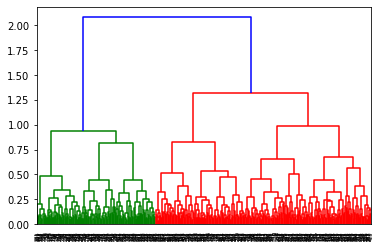

In [ ]:
dendrogram(input_linked)
plt.show();

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
labels = fcluster(input_linked, 3, criterion='maxclust')
labels

array([3, 1, 3, 2, 2, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 3, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 1, 3, 1, 2, 1, 3,
       3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 3, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 2, 3, 2, 1, 1, 2, 3, 3,
       1, 1, 2, 3, 2, 3, 3, 2, 3, 1, 2, 2, 3, 3, 2, 3, 1, 1, 1, 2, 3, 1,
       3, 1, 2, 2, 1, 2, 3, 2, 3, 3, 3, 1, 3, 2, 3, 2, 1, 3, 2, 1, 3, 3,
       3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 2, 3, 3, 1, 1, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 2, 3, 3, 2, 3, 3, 1, 3, 2, 2, 1, 1, 3, 1, 3, 2, 3,
       2, 2, 3, 1, 3, 3, 3, 2, 3, 2, 2, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 1,
       1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 1, 1, 2, 1, 3, 2, 2, 3, 2, 2, 3, 1, 2, 1, 3, 2, 1, 1, 3, 1,
       3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3,
       1, 3, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2,

In [ ]:
import cv2

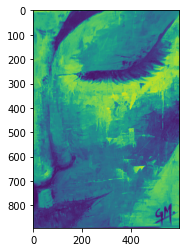

In [ ]:
image1 = cv2.imread("/content/1.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image1)

In [ ]:
image1.shape

(892, 600)

In [ ]:
892 * 600

535200

In [ ]:
image1

array([[205, 196, 198, ..., 116, 114, 112],
       [206, 197, 199, ..., 115, 115, 114],
       [206, 198, 199, ..., 113, 114, 113],
       ...,
       [ 48,  52,  54, ..., 141, 140, 139],
       [ 48,  51,  53, ..., 141, 140, 139],
       [ 48,  51,  53, ..., 141, 140, 139]], dtype=uint8)

In [ ]:
from random import seed, randint

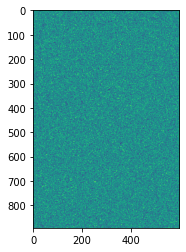

In [ ]:
seed(484)
img = []
for _ in range(535200):
  value = randint(0, 256)
  img.append(value)
img = np.array(img, dtype=np.uint8)
new_img = img.reshape(892,600)
plt.imshow(new_img);

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_input, train_output), (test_input, test_output) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
answer = train_input[0]
answer

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
answer = answer.reshape(1, -1)
answer

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

In [ ]:
n_img = new_img.reshape(1, -1)
n_img2 = image1.reshape(1, -1)
np.corrcoef(n_img, n_img2)

array([[1.        , 0.00240668],
       [0.00240668, 1.        ]])

In [ ]:
image1 = cv2.imread("/content/1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("/content/2.jpg", cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread("/content/3.jpg", cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread("/content/4.jpg", cv2.IMREAD_GRAYSCALE)
image5 = cv2.imread("/content/5.jpg", cv2.IMREAD_GRAYSCALE)
image6 = cv2.imread("/content/6.jpg", cv2.IMREAD_GRAYSCALE)
image7 = cv2.imread("/content/7.jpg", cv2.IMREAD_GRAYSCALE)
image8 = cv2.imread("/content/8.jpg", cv2.IMREAD_GRAYSCALE)
image9 = cv2.imread("/content/9.jpg", cv2.IMREAD_GRAYSCALE)
image10 = cv2.imread("/content/10.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
img1 = cv2.resize(image1, (100,100))
img2 = cv2.resize(image2, (100,100))
img3 = cv2.resize(image3, (100,100))
img4 = cv2.resize(image4, (100,100))
img5 = cv2.resize(image5, (100,100))
img6 = cv2.resize(image6, (100,100))
img7 = cv2.resize(image7, (100,100))
img8 = cv2.resize(image8, (100,100))
img9 = cv2.resize(image9, (100,100))
img10 = cv2.resize(image10, (100,100))
img_list = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10]

In [ ]:
max = 0
x = 0
y = 0
for i in range(9):
  for j in range(i+1, 9):
    tmp = np.corrcoef(img_list[i], img_list[j])[0][1]
    print(tmp)
    print(i, j)
    if tmp > max:
      max = tmp
      x = i
      y = j

print(max, i, j)

0.809260602339282
0 1
0.809260602339282
0 2
0.809260602339282
0 3
0.809260602339282
0 4
0.809260602339282
0 5
0.809260602339282
0 6
0.809260602339282
0 7
0.809260602339282
0 8
0.9584334605201489
1 2
0.9584334605201489
1 3
0.9584334605201489
1 4
0.9584334605201489
1 5
0.9584334605201489
1 6
0.9584334605201489
1 7
0.9584334605201489
1 8
nan
2 3
nan
2 4
nan
2 5
nan
2 6
nan
2 7
nan
2 8
-0.04331279994991579
3 4
-0.04331279994991579
3 5
-0.04331279994991579
3 6
-0.04331279994991579
3 7
-0.04331279994991579
3 8
0.9685492036890357
4 5
0.9685492036890357
4 6
0.9685492036890357
4 7
0.9685492036890357
4 8
0.9943028200291811
5 6
0.9943028200291811
5 7
0.9943028200291811
5 8
0.9863395460225062
6 7
0.9863395460225062
6 8
0.8377786998126018
7 8
0.9943028200291811 8 8


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


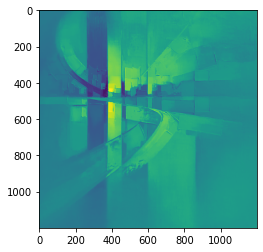

In [ ]:
plt.imshow(image5)

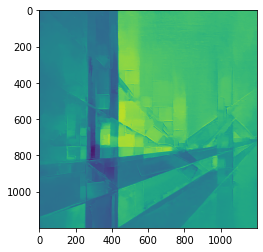

In [ ]:
plt.imshow(image6)

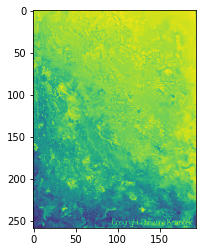

In [ ]:
plt.imshow(image9)

**4 - 12**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
run = True

while run:
  answer = int(input('Run program? Run - 1, Exit - 0 : '))
  if answer == 1:
    run = True
    supervise = int(input('Supervised - 1, Unsupervised - 2 : '))
    if supervise == 1:
      print('Supervised Learning')
      exam = int(input("Iris - 1, Breast cancer - 2, wine - 3 : "))
      if exam == 1:
        print('Iris data')
        iris = datasets.load_iris()
        df = pd.DataFrame(iris.data, columns = iris.feature_names)
        df['target'] = iris.target
        print(df.head())

        tt_ratio = int(input("train/test ratio? (10~30%) : "))
        tt_ratio = tt_ratio / 100

        X = iris.data
        y = iris.target

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio)

      elif exam == 2:
        print('Breast cancer data')
        breast = datasets.load_breast_cancer()
        df = pd.DataFrame(breast.data, columns = breast.feature_names.data)
        df['target'] = breast.target
        print(df.head())

        tt_ratio = int(input("train/test ratio? (10~30%) : "))
        tt_ratio = tt_ratio / 100

        X = breast.data
        y = breast.target

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio)

      elif exam == 3:
        print('Wine data')
        wine = datasets.load_wine()
        df = pd.DataFrame(wine.data, columns = wine.feature_names)
        df['target'] = wine.target
        print(df.head())

        tt_ratio = int(input("train/test ratio? (10~30%) : "))
        tt_ratio = tt_ratio / 100

        X = wine.data
        y = wine.target

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio)


    elif supervise == 2:
      print('Unsupervised Learning')
      exam1 = int(input("Boston house price - 1, Diabetes - 2 : "))
      if exam1 == 1:
        print('Boston house price data')
        boston = datasets.load_boston()
        df = pd.DataFrame(boston.data, columns = boston.feature_names)
        df['target'] = boston.target
        print(df.head())

        tt_ratio = int(input("train/test ratio? (10~30%) : "))
        tt_ratio = tt_ratio / 100

        X = boston.data
        y = boston.target

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio)

      elif exam1 == 2:
        print('Diabetes data')
        diabetes = datasets.load_diabetes()
        df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
        df['target'] = diabetes.target
        print(df.head())

        tt_ratio = int(input("train/test ratio? (10~30%) : "))
        tt_ratio = tt_ratio / 100

        X = diabetes.data
        y = diabetes.target

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio)



  elif answer == 0:    
    run = False
    print('Exit program')
  else:
    print("Wrong Number")

**4 - 14**

In [ ]:
# 아이디어 먼저 : 번뜩이는 아이디어(영감)가 아니면 별로, 보통 실생활에서 나옴, 가식은 ㄴㄴ
#               - 절충, 합의: 상 못 탐

# 일단 시작: 추진력은 항상 필요, 시작하다보면 아이디어가 생길 수 있다. 

# 위하쌤의 절충 -> 기한을 정하고 그 이후까지 아이디어가 안나오면 차선책으로 제비뽑기
#               -> 만약 아이디어가 없으면 디자인에서 승부 -> 하루에 10분 브레인스토밍/개소리 타임(목적없이 개소리)
#               브레인 스토밍 팁 -> 완전 거꾸로/ 사이코패스처럼/ 도덕적 관념 무시 해보기

# 자료 없을 때 : 2014년 자료 -> 2014년하고 2020년하고 동일하게 쓰거나, 경향성 가정
#                동일하게 가정 - 왜 동일한가 근거를 제시해야 함
#                경향성 가정 (2010년, 2011년, 2012년, 2013년, 2014년 회귀로 기울기를 만들어 
#                             2015년, 2016년을 예측해봐라) 근거없는거 아님

# 정확도 70% .... 일반적으로 낮다
# 1. 정확도 제시만(아이디어 싸움) 할 수도 
# 2. 낮아서 찝찝? - 다른 기법을 써봤더니 몇 퍼센트, 몇 퍼센트다~ 우리 것이 더 높다? 더 낮다 등 (성의를 보여라)

In [ ]:
# 번뜩이는 아이디어 없음 -> 일단 강수&지하수&수질&가뭄&농작물 관련해서 아이디어로 시작해보기 ->
# 없는 자료는 회귀로 시기 예측해서 데이터 넣기 -> 하루에 한번씩 주제 관련 미친 브레인 스토밍 해보기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

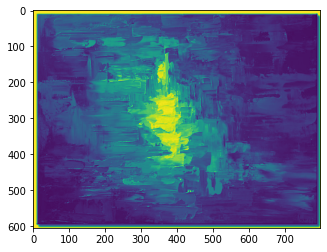

In [ ]:
image = cv2.imread('/content/3.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image);

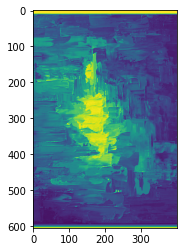

In [ ]:
img_cut = image[:, 200:600]
plt.imshow(img_cut)

**4 - 19**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from wiha_module import ratio_scale_per as wiha
#회귀 빼먹었다.

In [ ]:
run=True
while run:
  answer=int(input("프로그램을 돌리시겠습니까? 돌리실 것이면 1, 아니면 0을 기입하세요."))
  if answer==1:
    run=True
    supervised=int(input("지도학습이면 1, 비지도학습이면 0을 기입하세요."))
    if supervised==1:
      exam=int(input("어떤 예제 사용? 붓꽃=1, 유방암=2, 와인=3"))
      if exam==1:
        print("붓꽃 예제를 선택하셨습니다.")
        iris=datasets.load_iris()
        df=pd.DataFrame(iris.data)
        df['target']=iris.target
        df.head()

        ratio=int(input("train/test 비율을 어떻게 하실 것입니까? test 데이터의 비율을 입력해주세요. 0~30%까지"))
        #ratio=ratio/100
        ratio=wiha.ratio_scale_per(ratio)
        if ratio>0.3:
          print("test 비율이 너무 높습니다. 다시 입력해주세요.")
          ratio=int(input("train/test 비율을 어떻게 하실 것입니까? test 데이터의 비율을 입력해주세요. 0~30%까지"))
          
          #ratio=ratio/100
          ratio=wiha.ratio_scale_per(ratio)
        else:
          input_data=iris.data
          output_data=iris.target
          train_input,test_input,train_output,test_output=train_test_split(input_data,output_data,test_size=ratio)
          print("테스트 비율이 {}%로 설정되었습니다.".format(ratio*100))

          method=int(input("어떤 머신러닝 기법을 사용하겠습니까? KNN=1, SVM=2, RF=3, DNN=4"))
          if method==1:
            print("KNN을 선택하셨습니다.")
            neighbor=int(input("근접한 몇 개의 데이터를 기준으로 머신러닝을 진행하실 것입니까?"))
            
            kn=KNeighborsClassifier(n_neighbors=neighbor) #hyperparameter, K value
            kn.fit(train_input,train_output)
            print("정확도는 {}%입니다.".format(kn.score(test_input,test_output)*100))
            a=float(input("꽃봉우리의 길이는?"))
            b=float(input("꽃봉우리의 넓이는?"))
            c=float(input("꽃잎의 길이는?"))
            d=float(input("꽃잎의 넓이는?"))
            flower=kn.predict(np.array([a,b,c,d]).reshape(-1,4))
            if flower==0:
              print("이 꽃은 {}%의 확률로 setosa입니다.".format(kn.score(test_input,test_output)*100))
            elif flower==1:
              print("이 꽃은 {}%의 확률로 vericolor입니다.".format(kn.score(test_input,test_output)*100))
            elif flower==2:
              print("이 꽃은 {}%의 확률로 virginica입니다.".format(kn.score(test_input,test_output)*100))
          elif method==2:
            print("SVC를 선택하셨습니다.")
            c_value=float(input("어느 정도로 빡세게 가르실 것입니까? 빡세게 하려면 큰 수, 덜 빡세게 하려면 작은 수"))
            svc=SVC(kernel='rbf', C=c_value) #kernel=가장 좋은 거
            svc.fit(train_input,train_output)
            print("정확도는 {}%입니다.".format(svc.score(test_input,test_output)*100))
            a=float(input("꽃봉우리의 길이는?"))
            b=float(input("꽃봉우리의 넓이는?"))
            c=float(input("꽃잎의 길이는?"))
            d=float(input("꽃잎의 넓이는?"))
            flower=svc.predict(np.array([a,b,c,d]).reshape(-1,4))
            if flower==0:
              print("이 꽃은 {}%의 확률로 setosa입니다.".format(svc.score(test_input,test_output)*100))
            elif flower==1:
              print("이 꽃은 {}%의 확률로 vericolor입니다.".format(svc.score(test_input,test_output)*100))
            elif flower==2:
              print("이 꽃은 {}%의 확률로 virginica입니다.".format(svc.score(test_input,test_output)*100))




      elif exam==2:
        print("유방암 예제를 선택하셨습니다.")
        cancer=datasets.load_breast_cancer()
        df=pd.DataFrame(cancer.data)
        df['cancer']=cancer.target
        df.head()
      elif exam==3:
        print("와인 예제를 선택하셨습니다.")
        wine=datasets.load_wine()
        df=pd.DataFrame(wine.data)
        df['target']=wine.target
        df.head()
        
    elif supervised==0:
      print("비지도학습")
      exam=int(input("어떤 예제 사용? 보스턴 집값=1, 당뇨병=2"))
      if exam==1:
        print("보스턴 예제를 선택하셨습니다.")
        boston=datasets.load_boston
        df=pd.DataFrame(boston.data)
        df['price']=boston.target
        df.head()
      elif exam==2:
        print("당뇨병 예제를 선택하셨습니다.")
        diabete=datasets.load_diabetes
        df=pd.DataFrame(diabete.data)
        df['degree']=diabete.target
        df.head()






  elif answer==0:
    print("시스템을 종료합니다.")
    c_value=0 #초기화 코드
    c_value=0 #초기화 코드
    c_value=0 #초기화 코드
    run=False
  else:
    print("잘못 입력하셨습니다.")
    run=True

프로그램을 돌리시겠습니까? 돌리실 것이면 1, 아니면 0을 기입하세요.0
시스템을 종료합니다.
